In [85]:
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
import cv2
import numpy as np


In [86]:
#Creates an array that resembles histogram data in a shape of (1,256)

def createHistoArray(img):
    Histo = np.zeros(shape=(256,1))
    shape = img.shape
    for horizontal in range(shape[0]):
        for vertical in range(shape[1]):
            temp = img[horizontal,vertical]
            Histo[temp,0]=Histo[temp,0] + 1
    return Histo

In [87]:
#Reditributes the grayscale to be applied on images later on
#Ex: if we have an Input = [0,1,2,3,4,5,6,7] , Output = [0,1,2,3,3,3,4,5]

def redistributeGrayScale(histoArray, img):
    cumu = np.array([])
    cumu = np.append(cumu,img[0,0])
    shape = img.shape
    for i in range(255):
        temp = histoArray[0,i+1] + cumu[i]
        cumu = np.append(cumu,temp)
    max = np.amax(img) 
    cumu = np.round((cumu/(shape[0]*shape[1]))* 255)
    return cumu

In [88]:
#Maps new values for the pixels of the image according to the new distribution of GrayScale generated earlier

def mapPixels(cumu,original):
    img = np.full_like(original, 0)
    shape = original.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            temp = original[i,j]
            img[i,j] = cumu[temp]
    return img

In [89]:
#Call this function to equalize your histogram

def equalize(img):
    img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    histoArray = createHistoArray(img_gray)
    histoArray = np.transpose(histoArray)
    redistributedGrayScale = redistributeGrayScale(histoArray, img_gray)
    equalized_img = mapPixels(redistributedGrayScale,img_gray)
    
    
    return equalized_img

In [90]:
def showHistogram(data):
    no_of_bins = np.arange(256)
    data_rav = data.ravel() #spreads image pixels into one dimension
    histogram = plt.hist(data_rav ,bins = no_of_bins)

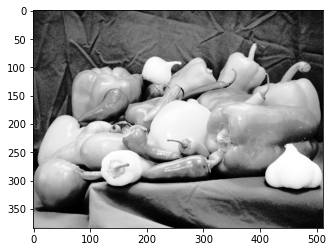

In [127]:
# Code is done
## Now for the DEMO :)

im = cv2.imread("peppers.png") #Put your RELATIVE path here
im_equalized = equalize(im)

plt.imshow(im_equalized,cmap=plt.get_cmap('gray'))

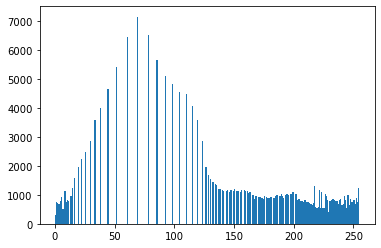

In [126]:
showHistogram(im_equalized)